In [1]:
!pip install  tensorflow 

In [3]:
#Here we check tensorflow version 
import tensorflow as tf 
tf. print(tf. __version__) 

2.11.0


In [4]:
#Creating a path to read data 
import tensorflow as tf  
import os 
os.path.join('data' , 'happy')

'data\\happy'

In [5]:
#to avoid memorty errors 
gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus :  
  tf.config.experimental.set_memory_growth(gpu , True) 

In [6]:
#Install open  opencv-python to read images 
!pip install opencv-python

In [7]:
import cv2 
import imghdr 

In [8]:
#determin a  specific extensions to remove dodgy images 
image_exts = ['jpeg' , 'png','bmp','jpg','gif']

In [9]:
#we will loop on data inside that folder 
data_dir =  r"C:\Users\user\Desktop\data"

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
#here we are printing all the data in the directory 
for img_class in os.listdir(data_dir)  :
    for img in os.listdir(os.path.join(data_dir , img_class)):
        print(img)

05-12-21-happy-people.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
110754-utyeqqosky-1547658396.jpeg
170404-happy-workers-feature.jpg
171120-smile-stock-njs-333p.jpg
1902540.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
202207181149254925.jpg
35438_hd.jpg
7-Habits-of-Happy-People-image.jpeg
8fc39ae2301e4355a91340731ed2198f_320_320.jpeg
960x0.jpg
AOh-ky0fgixvKGrEzk10sMVeRaMZUj6rs59P7n6RHeqTs64-c-mo.jpg
A_Sep20_14_1189155141.jpg
compassion-900x387.jpg
Dollarphotoclub_76084977-1.jpg
e162ccda8ce0f197f8863f327add9233.jpg
freedom-serenity-concept-female-model-ecstatic-enjoyment-mixed-race-34800382.jpg
friends-happy-190821.jpg
friends_190412.jpg
fun-happy-young-people-jumping-beach-group-friends-enjoying-summer-124156043.jpg
Gardening.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740.jpg
GettyImages-906648100-1024x684.jpg
getty_143919450_9706479704500104_51510.jpg
getty_152414899_97

In [12]:
imghdr.what( r"C:\Users\user\Desktop\data\happy\try.jpg")

'jpeg'

In [13]:
#Here we are checking and removing the unwanted extensions
for img_class in os.listdir(data_dir)  :
    for img in os.listdir(os.path.join(data_dir , img_class)): 
        img_path = os.path.join(data_dir , img_class , img )  
        img = cv2.imread(img_path) 
        tip = imghdr.what(img_path)
        if tip not in image_exts : 
            print('image not in exst_list {}'.format(img_path))
            os.remove(img_path) 
       
          
              

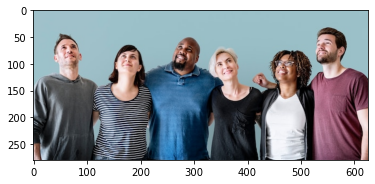

In [14]:
#showing an image and converting it from GBR to RGB 
#as open cv read images in GBR
from matplotlib import pyplot as plt 
#path = os.path.join( , img_class , img )  
img = cv2.imread(os.path.join( r"C:\Users\user\Desktop\data" , 'happy' , 'try.jpg')) 
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))


In [15]:
tf.data.Dataset??

In [16]:
# An overview of tf. data, That Dataset API allows you to build an asynchronous, 
# highly optimized data pipeline to prevent your GPU from data starvation.
#It loads data from the disk (images or text),
# applies optimized transformations, creates batches and sends it to the GPU. 
#batch : the number of training examples utilized in one iteration 
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 254 files belonging to 2 classes.


In [17]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
import numpy as np 
#A as_numpy_iterator() function returns an iterator which converts all elements of the dataset to numpy. Map transformation applies map_func to each element of this dataset, and returns a new dataset
#containing the transformed elements, 
#in the same order as they appeared in the input.

data_itr = data.as_numpy_iterator() 
data_itr

In [19]:

batch = data_itr.next()

In [20]:
#here batch[0] carry the value , batch[1] carry the lable 
batch[1]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

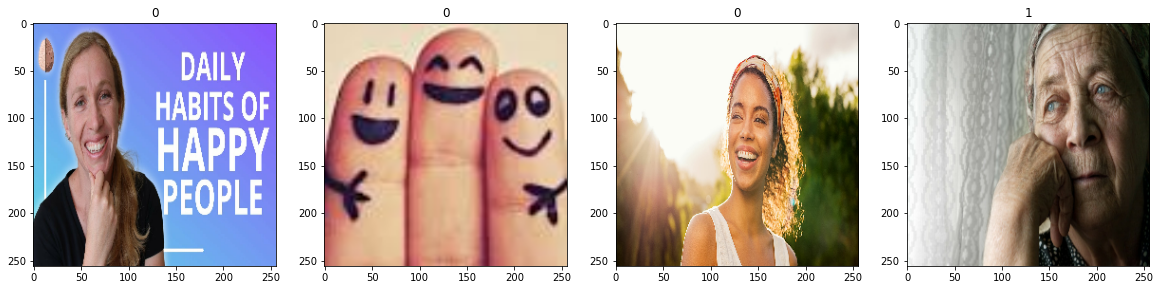

In [21]:
# class 0 = happy 
#class 1 = sad 
fig , ax = plt.subplots(ncols = 4 , figsize=(20 , 20 )) 
for idx , img in enumerate(batch[0][:4]) : 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
#lets scall the data  
data = data.map(lambda x , y : (x/255 , y)) 
scaled_itr = data.as_numpy_iterator()
batch = scaled_itr.next() 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


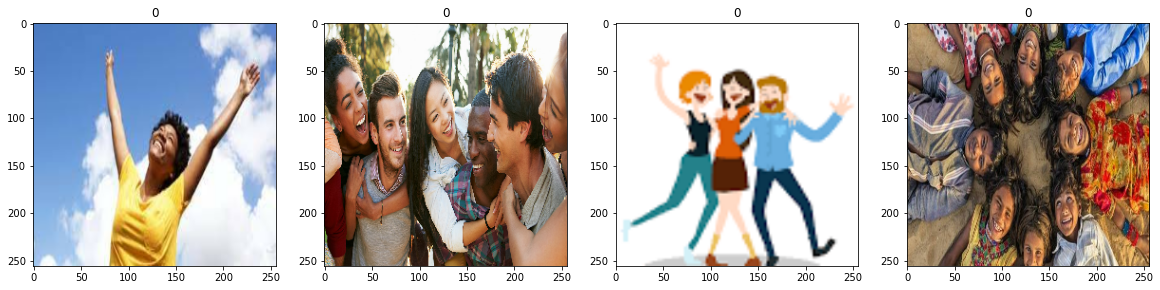

In [23]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20 , 20 )) 
for idx , img in enumerate(batch[0][:4]) : 
    #here we should keep it floate in order not to be scaled to zero and get black images 
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

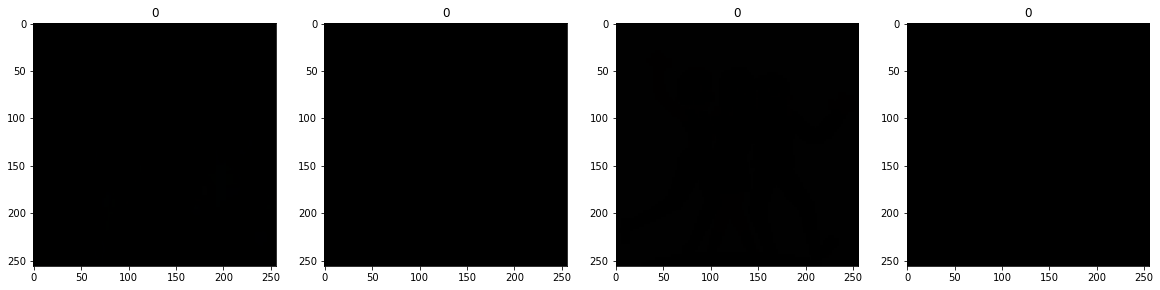

In [24]:
# a trial for black (due to images are converted into int_type)
fig , ax = plt.subplots(ncols = 4 , figsize=(20 , 20 )) 
for idx , img in enumerate(batch[0][:4]) : 
    #here we should keep it floate in order not to be scaled to zero and get black images 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
len(data)

8

In [26]:
#Data spliting tarining 70% , validation 10% , testing 20%
train_size = int(len(data)*.7) 
val_size = int(len(data)*.1) +1
test_size = int(len(data)*.2)+1

In [27]:
train_size +val_size +test_size 

8

In [28]:
train = data.take(train_size) 
val = data.skip(train_size).take(val_size) 
test = data.skip(train_size + val_size).take(test_size)

In [29]:
# The core idea of Sequential API is simply arranging the Keras layers in a sequential order
# and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the 
# given order until the data finally reaches the output layer. 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten 

In [30]:
batch[0].shape

(32, 256, 256, 3)

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16 , (3 , 3) , 1 , activation = 'relu' , input_shape=(256 , 256 , 3))) 
model.add(MaxPooling2D())  

model.add(Conv2D(32  , (3 , 3) , 1 , activation = 'relu' )) 
model.add(MaxPooling2D())  

model.add(Conv2D(16  , (3 , 3) , 1 , activation = 'relu' )) 
model.add(MaxPooling2D())  

model.add(Flatten()) 
model.add(Dense(256 , activation='relu')) 
model.add(Dense(1 , activation = 'sigmoid')) 

model.compile('adam' , loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy']) 

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
#he made it to store the data in a folder on pc 
logdir=r"C:\Users\user\Desktop\logs"  
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
#model.compile(optimizer="adam", loss=loss_fn)
hist = model.fit(train , epochs = 20 , validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 13s 2s/step - loss: 1.3835 - accuracy: 0.4563 - val_loss: 0.6677 - val_accuracy: 0.5625
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.6663 - accuracy: 0.5375 - val_loss: 0.6999 - val_accuracy: 0.3750
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.6436 - accuracy: 0.5562 - val_loss: 0.6255 - val_accuracy: 0.6250
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.6286 - accuracy: 0.6250 - val_loss: 0.5460 - val_accuracy: 0.7188
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.5756 - accuracy: 0.7437 - val_loss: 0.5710 - val_accuracy: 0.7188
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.5105 - accuracy: 0.8188 - val_loss: 0.4725 - val_accuracy: 0.7812
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.4298 - accuracy: 0.8125 - val_loss: 0.3820 - val_accuracy: 0.8125
Epoch 8/20
5/5 [========================

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

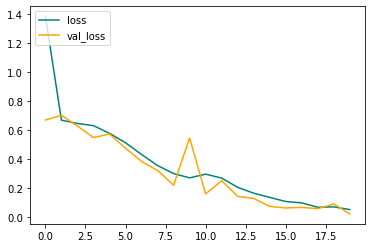

In [36]:
fig = plt.figure() 
plt.plot(hist.history['loss'] , color='teal' , label = 'loss') 
plt.plot(hist.history['val_loss'] , color='orange' , label = 'val_loss') 
plt.legend(loc ="upper left") 
plt.show()

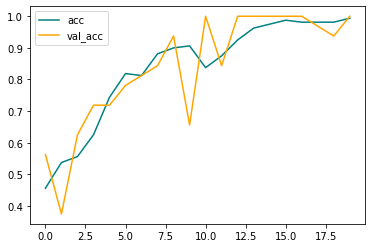

In [37]:
fig = plt.figure() 
plt.plot(hist.history['accuracy'] , color='teal' , label = 'acc') 
plt.plot(hist.history['val_accuracy'] , color='orange' , label = 'val_acc') 
plt.legend(loc ="upper left") 
plt.show()

In [38]:
#the evaluation metrices  
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [39]:
pre = Precision()  
rec = Recall()  
acc = BinaryAccuracy()

In [40]:
len(test)

2

In [41]:
for batch in test.as_numpy_iterator() :  
    x , y = batch  
    yhat = model.predict(x)  
    pre.update_state(y , yhat) 
    rec.update_state(y , yhat) 
    acc.update_state(y , yhat)
    
    
    

1/1 [==============================] - 0s 187ms/step


In [42]:
#Evataion metrices to check model performance 
print(pre.result()) 
print(rec.result()) 
print(acc.result())  


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


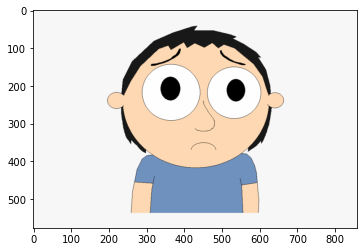

In [43]:
import cv2  
#testing on a random unseen images
img = cv2.imread(r"C:\Users\user\Desktop\data\sad\280-2804580_sad-people-png-sad-person-png-transparent-png.png") 
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [49]:
resize.shape

TensorShape([256, 256, 3])

In [50]:
yhat  = model.predict(np.expand_dims(resize/255 , 0 ))

1/1 [==============================] - 0s 46ms/step


In [51]:
yhat

array([[0.9999459]], dtype=float32)

sad person


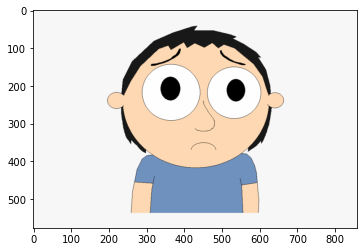

In [52]:
#since we should send it in the same as the training was which is 256 256 3  
#image appears in GBR so we need to convert it to RGB 
resize = tf.image.resize(img , (256 , 256 )) 
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB)) 

if yhat > 0.5 : 
    print("sad person") 
else  : 
        print("happy one ")

In [53]:
if yhat > 0.5 : 
    print("sad person") 
else  : 
        print("happy one ")

sad person


In [54]:
#Save the model
from tensorflow.keras.models import load_model  
model.save(os.path.join('models' , 'happysadmodel.h5')) 

new_model = load_model(os.path.join('models' , 'happysadmodel.h5')) 
os.path.join('models' , 'happysadmodel.h5')

#yhat_new = new_model.predict(np.expand_dims(resize/255 , 0 ))


'models\\happysadmodel.h5'